In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("D:\Advanced-training-Python-AIML\datasets\Algerian_forest_fires_cleaned_dataset.csv")

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.shape

(243, 15)

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df.drop(columns = ['day', 'month', 'year'], inplace = True)

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [14]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [15]:
##Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [16]:
df['Classes'].unique()

array([0, 1])

In [17]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Classes'] = LE.fit_transform(df['Classes'])

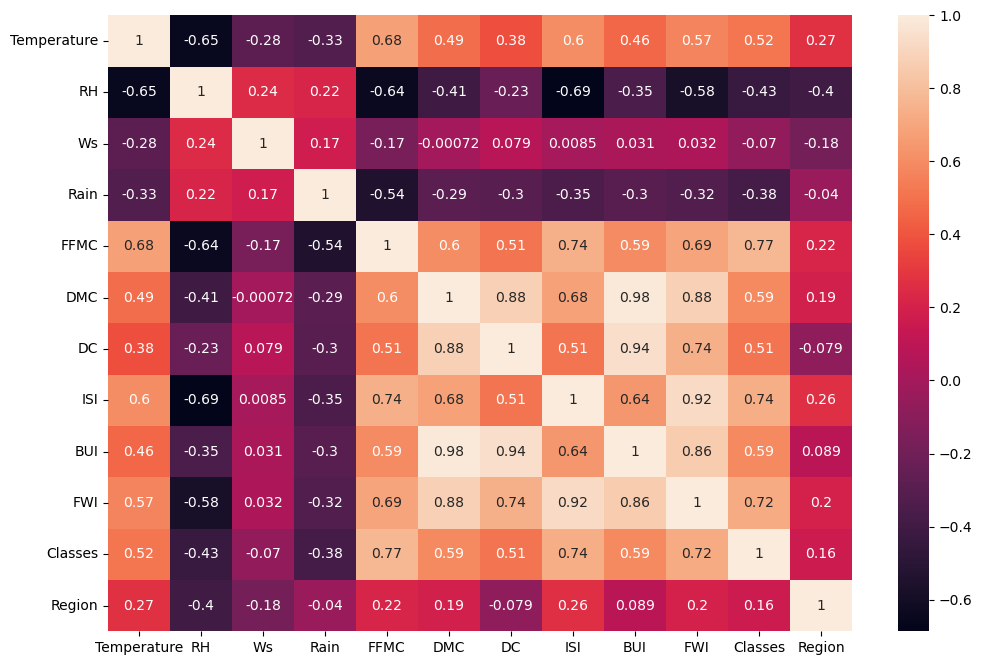

In [26]:
plt.figure(figsize=(12, 8)) 
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot = True)
plt.show()


In [45]:
y=df['FWI'] 
x=df.drop(columns=['FWI'])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
LR=LinearRegression(n_jobs=-1)
LR.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [47]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        # print(corr_matrix.iloc[i])
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [49]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

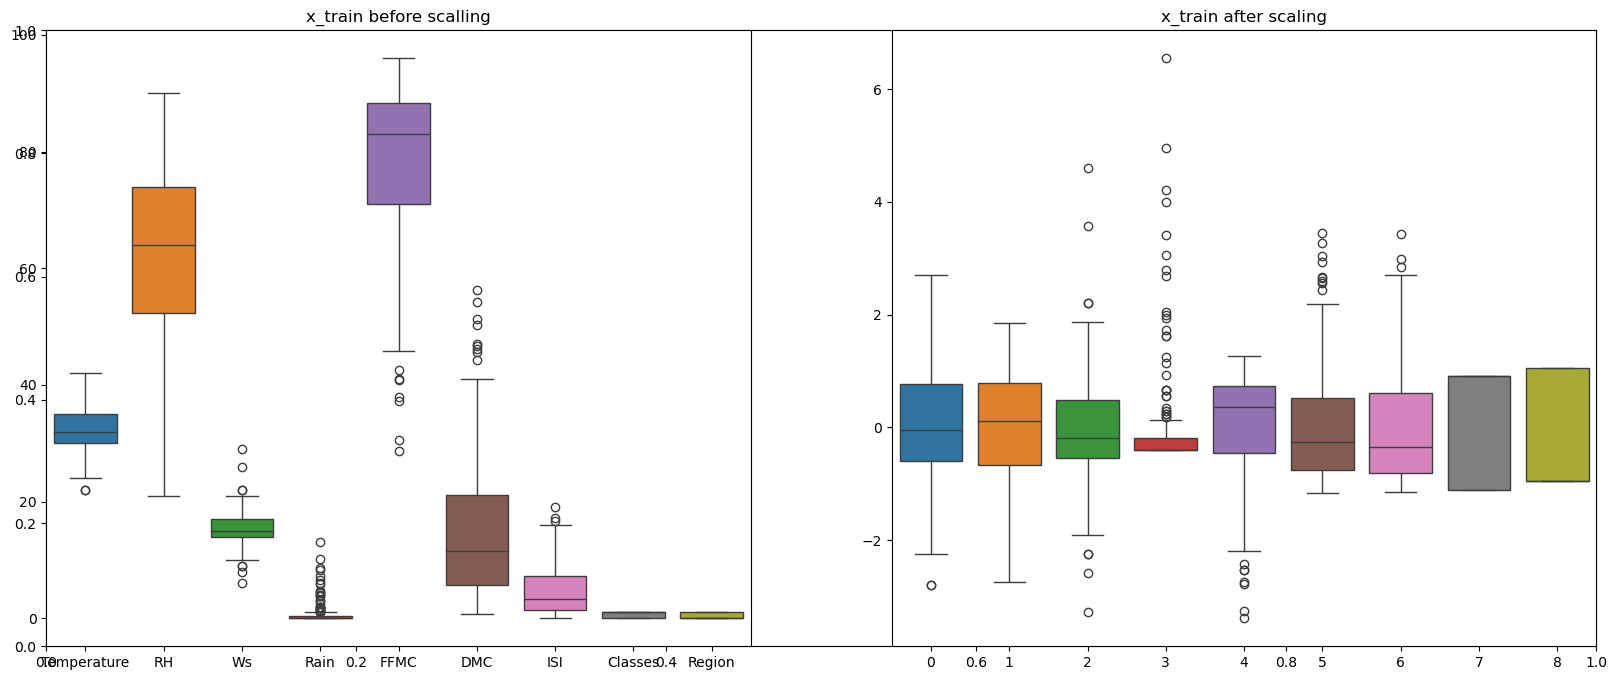

In [56]:
plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scalling")
plt.subplot(1,2,2)
sns.boxplot(data=xtrainscaled)
plt.title('x_train after scaling')

mean_absolute_error  0.6540738799510456
r2_score  0.9857546830691463


<Axes: xlabel='FWI'>

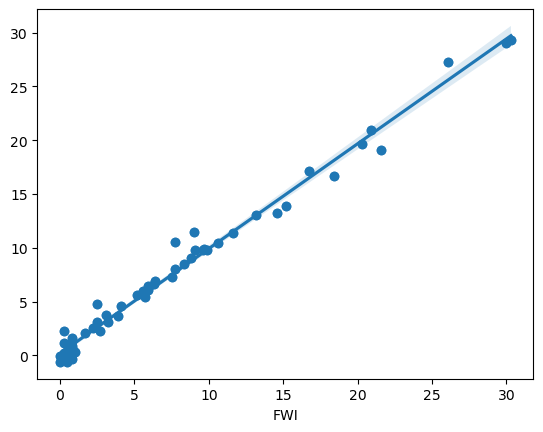

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

mean_absolute_error  1.2744974892422076
r2_score  0.9531857107847488


<Axes: xlabel='FWI'>

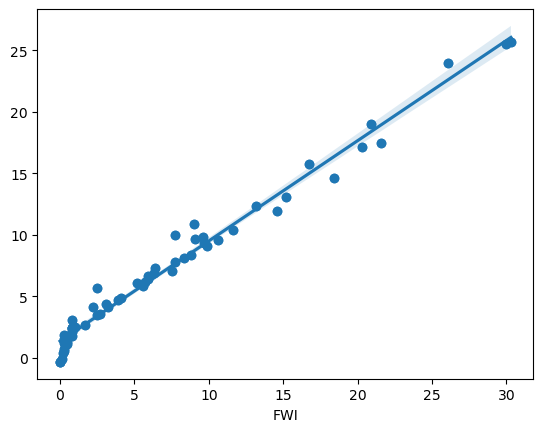

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

mean_absolute_error  0.6670190933608144
r2_score  0.9852445222743055


<Axes: xlabel='FWI'>

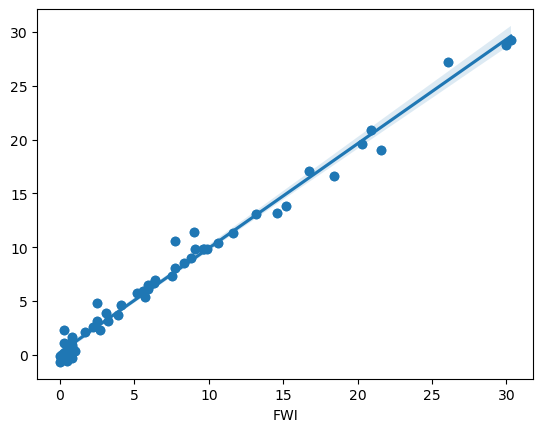

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)